In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:100]
y = iris.target[:100].reshape(-1, 1)
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['target'] = y

print(df_iris)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

    target  
0        0  
1        0  


In [17]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
df_iris 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [32]:
np.random.seed(42)
weights = np.random.randn(X_scaled.shape[1], 2)  
bias = np.random.randn(1, 2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

manual_output = sigmoid(np.dot(X_scaled, weights) + bias)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(2, input_shape=(X_scaled.shape[1],), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_scaled, y_encoded, epochs=10, verbose=0)

keras_output = model.predict(X_scaled)

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


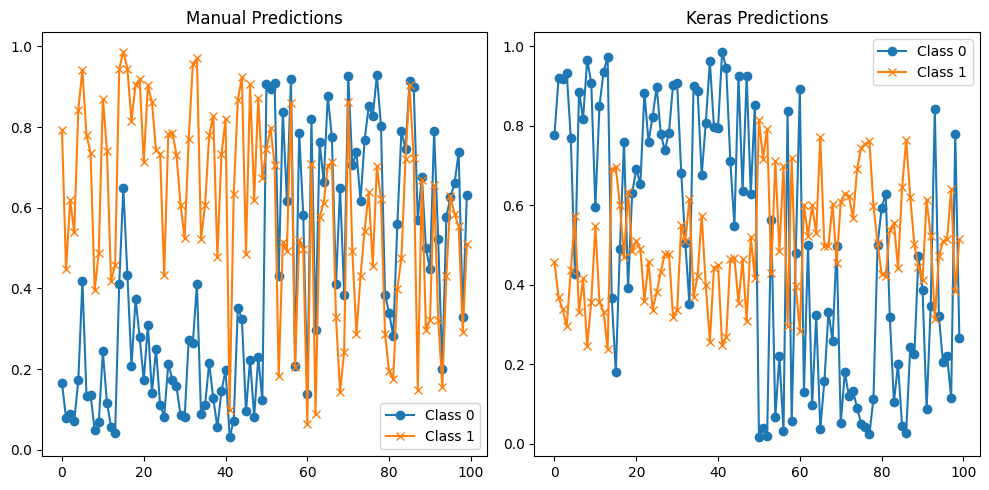

In [35]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Manual Predictions")
plt.plot(manual_output[:, 0], label='Class 0', marker='o')
plt.plot(manual_output[:, 1], label='Class 1', marker='x')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Keras Predictions")
plt.plot(keras_output[:, 0], label='Class 0', marker='o')
plt.plot(keras_output[:, 1], label='Class 1', marker='x')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
comparison_df = pd.DataFrame({
    'Manual_Class0': manual_output[:, 0],
    'Manual_Class1': manual_output[:, 1],
    'Keras_Class0': keras_output[:, 0],
    'Keras_Class1': keras_output[:, 1]
})

print(comparison_df.head(10))

   Manual_Class0  Manual_Class1  Keras_Class0  Keras_Class1
0       0.165016       0.792895      0.775436      0.457193
1       0.078941       0.446974      0.920116      0.368496
2       0.089135       0.619190      0.918572      0.338015
3       0.071063       0.538813      0.932334      0.295462
4       0.173188       0.843415      0.768045      0.437160
5       0.417967       0.941624      0.427564      0.571882
6       0.134065       0.780312      0.885383      0.331133
7       0.135711       0.736558      0.817928      0.415841
8       0.048256       0.395473      0.965730      0.246089
9       0.067994       0.488532      0.907734      0.357206
